# Exo planet Anaylsis
----
Anaylsis performed for Hack benchers 2 Project

In [6]:
# Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Reading CSV
data = pd.read_csv('oec.csv')
# Show data head
data.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


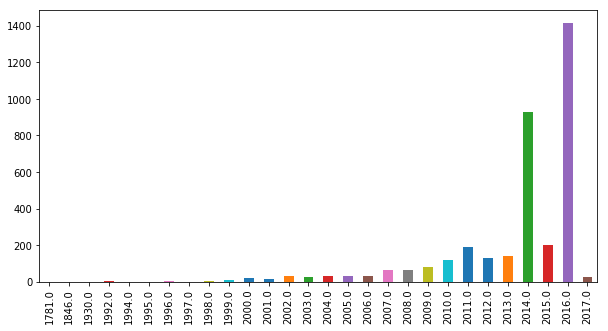

In [8]:
# Find Min amd Max of DistFromSunParsec
{ 'maximum': max(data["DistFromSunParsec"]), 'minimum': min(data["DistFromSunParsec"]) }
plt.figure(figsize=(10,5))
data["DiscoveryYear"].value_counts().sort_index().plot.bar()

In [9]:
# Convert RA to decimal degrees
data['RA'] = [str(i) for i in data['RightAscension']]
data['RA'] = [i.split(" ") for i in data['RA']]
data = data[[len(i) == 3 for i in data['RA']]]
data['RA'] = [float(j[0])*15 + float(j[1])/4 + float(j[2])/240 for j in data['RA']]

# Convert DEC to decimals degrees
data['DEC'] = [str(i) for i in data['Declination']]
data['DEC'] = [i.split(" ") for i in data['DEC']]
data['DEC'] = [float(j[0])*15 + float(j[1])/4 + float(j[2])/240 if float(j[0]) > 0 else float(float(j[0]) - float(j[1])/60 - float(j[2])/360) for j in data['DEC']]

Now as measurements of * **RA** (Right Ascension)* and * **DEC** (Declination)* are measured **geocentrically** i.e. they are measured with respect to earth. So finding distance between earth and exo planet we need to convert spherical co-ordinates to cartisian coordiates then use distance formula to find distance. After solving quadratic equation we get distance (**r**) as:

$$
r = d \cos{\delta}\cos{\alpha} + \sqrt(r_o^2 + d^2\cos^2{\delta} \cos^2{\alpha} - d^2)
$$

where $$ \\ r_o = \text{helocentric (i.e. from sun) distance of exoplanent} 
       \\ d = \textrm{distance of sun from earth}
       \\ \delta = \textrm{Declination of exoplanet (DEC)}
       \\ \alpha = \textrm{Right Ascension of exoplanet (RA)} $$

In [11]:
# adding distance of exoplanents from earth
d = 4.84814e-6 # in parsec
t = d*np.cos(data["DEC"])*np.cos(data["RA"])
data["DistFromEarthParsec"] = t + np.sqrt(np.square(data["DistFromSunParsec"]) + np.square(t) - d**2)
pd.Series(data["DistFromEarthParsec"], dtype="str")

0        17.23599966438967
1        17.23599966438967
2                      nan
3                      nan
4                      nan
5        650.0000020872146
6        650.0000020872146
7        650.0000020872146
8        43.24999919202795
9                      nan
10       433.0000040278421
11      142.99999866991246
12       6499.999999923183
13                     nan
14                     nan
15       200.0000044143451
16      14.550000985581605
17       626.1000012989033
18       626.1000012989033
19       77.82000035089696
20       77.82000035089696
21       63.68999856668064
22                     nan
23      48.300000320168344
24      48.300000320168344
25                     nan
26                     nan
27                     nan
28                     nan
29                     nan
               ...        
3554                   nan
3555                   nan
3556                   nan
3557     380.0000033657488
3558                   nan
3559                   nan
3

In [12]:
# Clean data
data = data[pd.Series(data["DistFromEarthParsec"], dtype="str") != "nan"]
len(data)

2133

In [13]:
# Sort by Distance from the earth
data.sort_values(by="DistFromEarthParsec", inplace=True)
data = data.reset_index(drop=True)

/home/rishabh3112/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


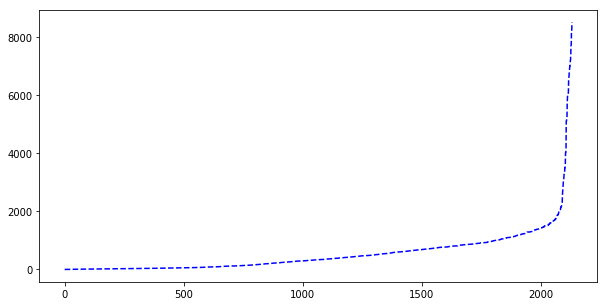

In [14]:
# Plot Distance from earth
plt.figure(figsize=(10,5))
#plt.xticks(np.arange(2133), data["PlanetIdentifier"])
plt.plot(np.array(data["DistFromEarthParsec"]).T,'b--')

In [9]:
data.iloc[0]

PlanetIdentifier                                       Proxima Centauri b
TypeFlag                                                                2
PlanetaryMassJpt                                                 0.004089
RadiusJpt                                                             NaN
PeriodDays                                                         11.186
SemiMajorAxisAU                                                    0.0485
Eccentricity                                                          NaN
PeriastronDeg                                                         NaN
LongitudeDeg                                                          110
AscendingNodeDeg                                                      NaN
InclinationDeg                                                        NaN
SurfaceTempK                                                          234
AgeGyr                                                                NaN
DiscoveryMethod                       

In [29]:
data[data["TypeFlag"] == 3]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,RA,DEC,DistFromEarthParsec
3,WISE 0855-0714,3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.31,NaN,NaN,NaN,NaN,NaN,Confirmed planets,133.795833,-7.797222,2.310000
207,PSO J318.5-22,3,6.5,1.53,NaN,NaN,NaN,NaN,NaN,NaN,...,24.60,NaN,NaN,NaN,NaN,NaN,"Confirmed planets, Orphan planets",318.533333,342.900000,24.600001
371,CFBDSIR2149,3,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.00,NaN,NaN,NaN,NaN,NaN,"Confirmed planets, Orphan planets",327.445833,-4.072222,39.999998


In [11]:
data[data["ListsPlanetIsOn"] == "Confirmed planets, Orphan planets"]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn,RA,DEC,DistFromEarthParsec
207,PSO J318.5-22,3,6.5,1.53,NaN,NaN,NaN,NaN,NaN,NaN,...,24.6,NaN,NaN,NaN,NaN,NaN,"Confirmed planets, Orphan planets",318.533333,342.900000,24.600001
371,CFBDSIR2149,3,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,NaN,NaN,NaN,NaN,NaN,"Confirmed planets, Orphan planets",327.445833,-4.072222,39.999998


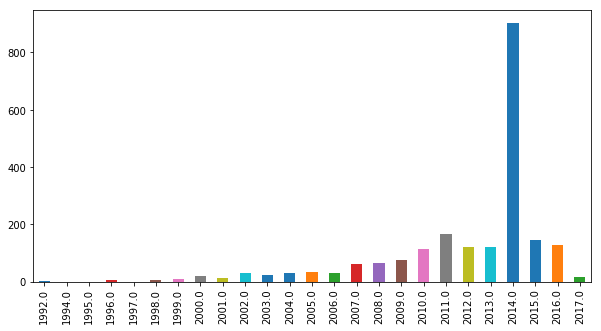

In [30]:
plt.figure(figsize=(10,5))
data["DiscoveryYear"].value_counts().sort_index().plot.bar()

In [12]:
# export dataframe as csv
data.to_csv("data.csv")